As we are performing stocks analysis, here are some potential analyses we can perform:


- Descriptive Statistics: Summary statistics (mean, median, standard deviation, etc.) for each stock.
- Time Series Analysis: Trends and patterns over time, especially for closing prices.
- Volatility Analysis: How much the stock price fluctuates over a period.
- Correlation Analysis: How stock prices of different companies are related to each other.
- Comparative Analysis: Comparing the performance of different stocks.
- Risk-Return Trade-off Analysis: Analyzing the balance between the potential risks and rewards of different stocks, aiding in portfolio management.


In [32]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
import plotly.io as pio

import seaborn as sns

import os


In [5]:
# Since I am currently inside the financial_data_analysis folder, ".." represents the parent directory (DataVisualization).
#  This command changes the current working directory to DataVisualization.
os.chdir('..')

In [6]:
# read the data

path = os.path.join('data', 'stocks.csv')


In [10]:
df = pd.read_csv(path, parse_dates= ['Date'])

In [11]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     248 non-null    object        
 1   Date       248 non-null    datetime64[ns]
 2   Open       248 non-null    float64       
 3   High       248 non-null    float64       
 4   Low        248 non-null    float64       
 5   Close      248 non-null    float64       
 6   Adj Close  248 non-null    float64       
 7   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.6+ KB


## Descriptive Statistics

Descriptive Statistics will provide summary statistics for each stock in the dataset. We’ll look at measures such as mean, median, standard deviation, and more for the Close prices:

In [13]:
desc_analy = df.groupby('Ticker')['Close'].describe()

print(desc_analy)

        count        mean        std         min         25%         50%  \
Ticker                                                                     
AAPL     62.0  158.240645   7.360485  145.309998  152.077499  158.055000   
GOOG     62.0  100.631532   6.279464   89.349998   94.702501  102.759998   
MSFT     62.0  275.039839  17.676231  246.270004  258.742500  275.810013   
NFLX     62.0  327.614677  18.554419  292.760010  315.672493  325.600006   

               75%         max  
Ticker                          
AAPL    165.162506  173.570007  
GOOG    105.962503  109.459999  
MSFT    287.217506  310.649994  
NFLX    338.899994  366.829987  


#### Let’s break down the results for each stock:

- AAPL (Apple Inc.)

  - Count: 62.0 (The number of observations or trading days included in the dataset for AAPL)
  - Mean: 158.24 (The average closing price)
  - Standard Deviation: 7.36 (Measures the amount of variation or dispersion of closing prices)
  - Minimum: 145.31 (The lowest closing price in the dataset)
  - 25th Percentile: 152.08 (25% of the closing prices are below this value)
  - Median (50%): 158.06 (The middle value of the closing prices)
  - 75th Percentile: 165.16 (75% of the closing prices are below this value)
  - Maximum: 173.57 (The highest closing price in the dataset)


- GOOG (Alphabet Inc.)

  - Similar statistics as AAPL, but for GOOG. The mean closing price is 100.63, with a standard deviation of 6.28, indicating less variability in closing prices compared to AAPL.


- MSFT (Microsoft Corporation)

  - The dataset includes the same number of observations for MSFT. It has a higher mean closing price of 275.04 and a higher standard deviation of 17.68, suggesting greater price variability than AAPL and GOOG.


- NFLX (Netflix Inc.)

  - NFLX shows the highest mean closing price (327.61) among these stocks and the highest standard deviation (18.55), indicating the most significant price fluctuation.

## Time Series Analysis

Next, we’ll proceed with the Time Series Analysis to examine trends and patterns over time, focusing on the closing prices:

In [14]:
pivot_data = df.pivot(index='Date', columns='Ticker', values='Close')

print(pivot_data)

Ticker            AAPL        GOOG        MSFT        NFLX
Date                                                      
2023-02-07  154.649994  108.040001  267.559998  362.950012
2023-02-08  151.919998  100.000000  266.730011  366.829987
2023-02-09  150.869995   95.459999  263.619995  362.500000
2023-02-10  151.009995   94.860001  263.100006  347.359985
2023-02-13  153.850006   95.000000  271.320007  358.570007
...                ...         ...         ...         ...
2023-05-01  169.589996  107.709999  305.559998  324.119995
2023-05-02  168.539993  105.980003  305.410004  317.549988
2023-05-03  167.449997  106.120003  304.399994  319.299988
2023-05-04  165.789993  105.209999  305.410004  320.779999
2023-05-05  173.570007  106.214996  310.649994  322.760010

[62 rows x 4 columns]


In [21]:
# Create a subplot
fig = make_subplots(rows=1, cols=1)

# Add traces for each stock ticker
for col in pivot_data.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[col], name=col),
        row=1, col=1
    )

fig.update_layout(
    title_text='Time Series of Closing Prices',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)

# fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'name': 'AAPL',
              'type': 'scatter',
              'x': array(['2023-02-07T00:00:00.000000000', '2023-02-08T00:00:00.000000000',
                          '2023-02-09T00:00:00.000000000', '2023-02-10T00:00:00.000000000',
                          '2023-02-13T00:00:00.000000000', '2023-02-14T00:00:00.000000000',
                          '2023-02-15T00:00:00.000000000', '2023-02-16T00:00:00.000000000',
                          '2023-02-17T00:00:00.000000000', '2023-02-21T00:00:00.000000000',
                          '2023-02-22T00:00:00.000000000', '2023-02-23T00:00:00.000000000',
                          '2023-02-24T00:00:00.000000000', '2023-02-27T00:00:00.000000000',
                          '2023-02-28T00:00:00.000000000', '2023-03-01T00:00:00.000000000',
                          '2023-03-02T00:00:00.000000000', '2023-03-03T00:00:00.000000000',
                          '2023-03-06T00:00:00.000000000', '2023-03-07T00:00:00.000000000',
                          '2023-03-08T00:00:00.000000000', '2023-03-09T00:00:00.000000000',
                          '2023-03-10T00:00:00.000000000', '2023-03-13T00:00:00.000000000',
                          '2023-03-14T00:00:00.000000000', '2023-03-15T00:00:00.000000000',
                          '2023-03-16T00:00:00.000000000', '2023-03-17T00:00:00.000000000',
                          '2023-03-20T00:00:00.000000000', '2023-03-21T00:00:00.000000000',
                          '2023-03-22T00:00:00.000000000', '2023-03-23T00:00:00.000000000',
                          '2023-03-24T00:00:00.000000000', '2023-03-27T00:00:00.000000000',
                          '2023-03-28T00:00:00.000000000', '2023-03-29T00:00:00.000000000',
                          '2023-03-30T00:00:00.000000000', '2023-03-31T00:00:00.000000000',
                          '2023-04-03T00:00:00.000000000', '2023-04-04T00:00:00.000000000',
                          '2023-04-05T00:00:00.000000000', '2023-04-06T00:00:00.000000000',
                          '2023-04-10T00:00:00.000000000', '2023-04-11T00:00:00.000000000',
                          '2023-04-12T00:00:00.000000000', '2023-04-13T00:00:00.000000000',
                          '2023-04-14T00:00:00.000000000', '2023-04-17T00:00:00.000000000',
                          '2023-04-18T00:00:00.000000000', '2023-04-19T00:00:00.000000000',
                          '2023-04-20T00:00:00.000000000', '2023-04-21T00:00:00.000000000',
                          '2023-04-24T00:00:00.000000000', '2023-04-25T00:00:00.000000000',
                          '2023-04-26T00:00:00.000000000', '2023-04-27T00:00:00.000000000',
                          '2023-04-28T00:00:00.000000000', '2023-05-01T00:00:00.000000000',
                          '2023-05-02T00:00:00.000000000', '2023-05-03T00:00:00.000000000',
                          '2023-05-04T00:00:00.000000000', '2023-05-05T00:00:00.000000000'],
                         dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('AAAAwMxUY0AAAACgcP1iQAAAAADX22' ... 'Bm7mRAAAAAoEe5ZEAAAACAPbJlQA=='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'name': 'GOOG',
              'type': 'scatter',
              'x': array(['2023-02-07T00:00:00.000000000', '2023-02-08T00:00:00.000000000',
                          '2023-02-09T00:00:00.000000000', '2023-02-10T00:00:00.000000000',
                          '2023-02-13T00:00:00.000000000', '2023-02-14T00:00:00.000000000',
                          '2023-02-15T00:00:00.000000000', '2023-02-16T00:00:00.000000000',
                          '2023-02-17T00:00:00.000000000', '2023-02-21T00:00:00.000000000',
                          '2023-02-22T00:00:00.000000000', '2023-02-23T00:00:00.000000000',
                          '2023-02-24T00:00:00.000000000', '2023-02-27T00:00:00.000000000',
                          '2023-02-28T00:00:00.000000000', '2023-03-01T00:00:00.000000000',
                          '2023

#### The above plot displays the time series of the closing prices for each stock (AAPL, GOOG, MSFT, NFLX) over the observed period. Here are some key observations:

`Trend`: Each stock shows its unique trend over time. For instance, AAPL and MSFT exhibit a general upward trend in this period.

`Volatility`: There is noticeable volatility in the stock prices. For example, NFLX shows more pronounced fluctuations compared to others.

`Comparative` Performance: When comparing the stocks, MSFT and NFLX generally trade at higher price levels than AAPL and GOOG in this dataset.


## Volatility Analysis

Next, let’s focus on Volatility Analysis. We’ll calculate and compare the volatility (standard deviation) of the closing prices for each stock. It will give us an insight into how much the stock prices fluctuated over the period:

In [22]:
volatility = pivot_data.std().sort_values(ascending=False)

print(volatility)

Ticker
NFLX    18.554419
MSFT    17.676231
AAPL     7.360485
GOOG     6.279464
dtype: float64


In [30]:
fig = px.bar(
    volatility,
    x=volatility.index,
    y=volatility.values,
    labels={'y': 'Standard Deviation', 'x': 'Ticker'},
    title = 'Volatility of Closing Prices '
)
# fig.show()

## Correlation Analysis

Next, we’ll perform a Correlation Analysis to understand how the stock prices of these companies are related to each other:

In [31]:
corr = pivot_data.corr()
print(corr)

Ticker      AAPL      GOOG      MSFT      NFLX
Ticker                                        
AAPL    1.000000  0.901662  0.953037  0.154418
GOOG    0.901662  1.000000  0.884527  0.201046
MSFT    0.953037  0.884527  1.000000  0.191273
NFLX    0.154418  0.201046  0.191273  1.000000


<Axes: xlabel='Ticker', ylabel='Ticker'>

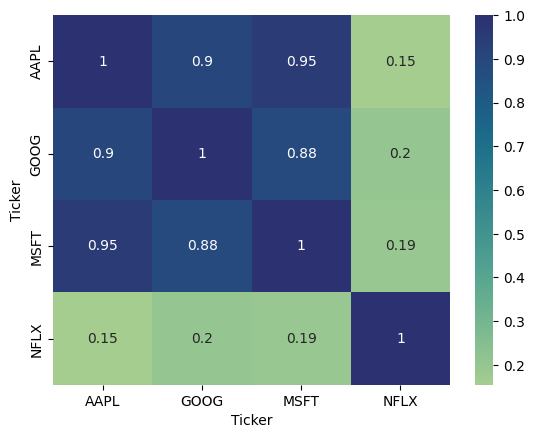

In [33]:
sns.heatmap(corr, annot=True, cmap='crest')

The heatmap above displays the correlation matrix of the closing prices of the four stocks (AAPL, GOOG, MSFT, NFLX). Here’s what the correlation coefficients suggest:

- Values close to +1 indicate a strong positive correlation, meaning that as one stock’s price increases, the other tends to increase as well.
-    Values close to -1 indicate a strong negative correlation, where one stock’s price increase corresponds to a decrease in the other.
 -   Values around 0 indicate a lack of correlation.

From the heatmap, we can observe that there are varying degrees of positive correlations between the stock prices, with some pairs showing stronger correlations than others. For instance, AAPL and MSFT seem to have a relatively higher positive correlation.


### Summary

So, this is how you can perform a Quantitative Analysis of the Stock Market using Python. Quantitative Analysis in the stock market is a financial methodology that utilizes mathematical and statistical techniques to analyze stocks and financial markets.